In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('ecommerce_complaint_prediction.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             500 non-null    int64 
 1   product_type         500 non-null    object
 2   price                500 non-null    int64 
 3   user_type            500 non-null    object
 4   device               500 non-null    object
 5   shipping_delay_days  500 non-null    int64 
 6   return_history       500 non-null    int64 
 7   complaint_flag       500 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 31.4+ KB


In [42]:
df.shape

(500, 8)

In [43]:
df.columns

Index(['order_id', 'product_type', 'price', 'user_type', 'device',
       'shipping_delay_days', 'return_history', 'complaint_flag'],
      dtype='object')

In [44]:
df.dtypes

order_id                int64
product_type           object
price                   int64
user_type              object
device                 object
shipping_delay_days     int64
return_history          int64
complaint_flag          int64
dtype: object

In [45]:
df.head()

,order_id,product_type,price,user_type,device,shipping_delay_days,return_history,complaint_flag
0,1,books,370,new,mobile,6,0,1
1,2,home_decor,2224,new,desktop,3,0,0
2,3,beauty,414,repeat,desktop,1,1,0
3,4,beauty,287,new,desktop,3,0,0
4,5,home_decor,1371,repeat,mobile,3,0,1


In [46]:
df.tail()

,order_id,product_type,price,user_type,device,shipping_delay_days,return_history,complaint_flag
495,496,beauty,306,new,mobile,1,1,0
496,497,clothing,517,repeat,mobile,7,0,0
497,498,home_decor,1005,repeat,mobile,5,0,0
498,499,books,616,new,mobile,1,0,0
499,500,electronics,4118,repeat,mobile,0,0,0


In [47]:
df.isna().sum()

order_id               0
product_type           0
price                  0
user_type              0
device                 0
shipping_delay_days    0
return_history         0
complaint_flag         0
dtype: int64

In [48]:
df.corr(numeric_only=True)

,order_id,price,shipping_delay_days,return_history,complaint_flag
order_id,1.000000,0.044661,-0.007767,0.007782,-0.042002
price,0.044661,1.000000,0.068423,-0.011485,0.078855
shipping_delay_days,-0.007767,0.068423,1.000000,0.005355,0.428538
return_history,0.007782,-0.011485,0.005355,1.000000,-0.026094
complaint_flag,-0.042002,0.078855,0.428538,-0.026094,1.000000


<Axes: >

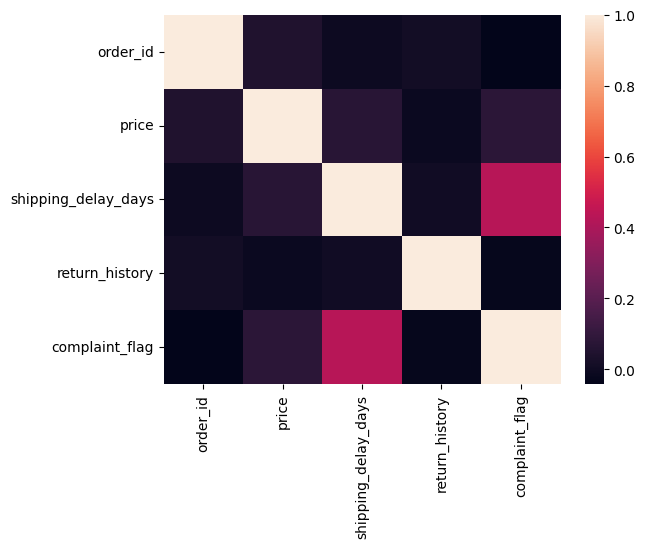

In [49]:
sns.heatmap(df.corr(numeric_only=True))

In [50]:

df.drop(['order_id','return_history'],axis=1,inplace=True)

In [51]:
df['device'].value_counts()

device
mobile     259
desktop    241
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Device')

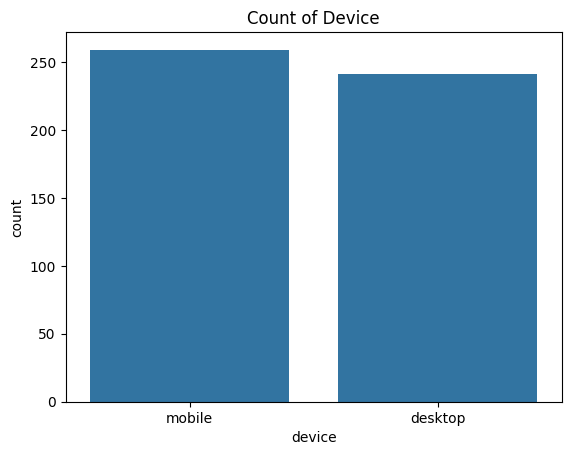

In [52]:
sns.countplot(x=df['device'])
plt.title('Count of Device')

<Axes: xlabel='device', ylabel='count'>

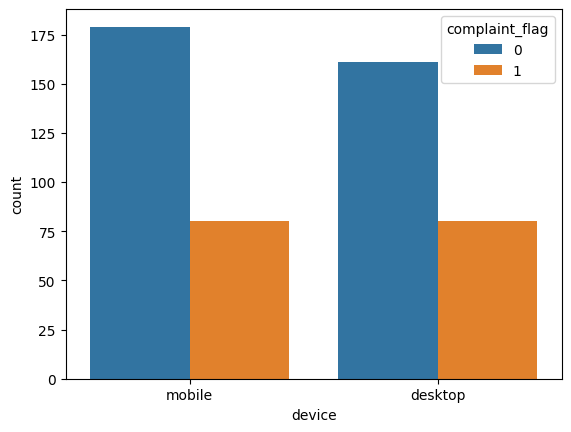

In [53]:
#how did the count on device affected the complaint registrations
sns.countplot(x=df['device'],hue='complaint_flag',data=df)

In [54]:
df['product_type'].value_counts()

product_type
books          107
beauty         106
home_decor     100
electronics    100
clothing        87
Name: count, dtype: int64

Text(0.5, 1.0, 'Different Product')

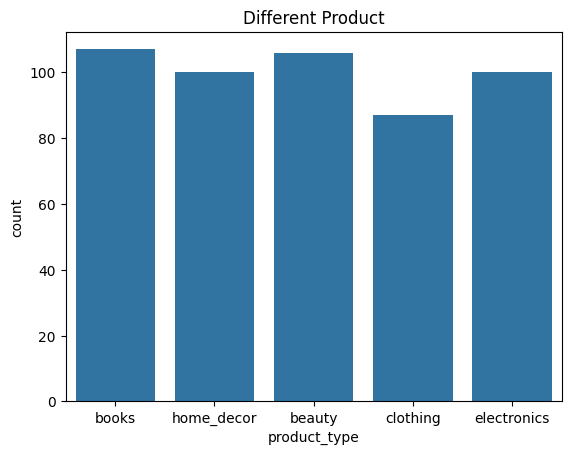

In [55]:
sns.countplot(x=df['product_type'])
plt.title('Different Product')

<Axes: xlabel='product_type', ylabel='count'>

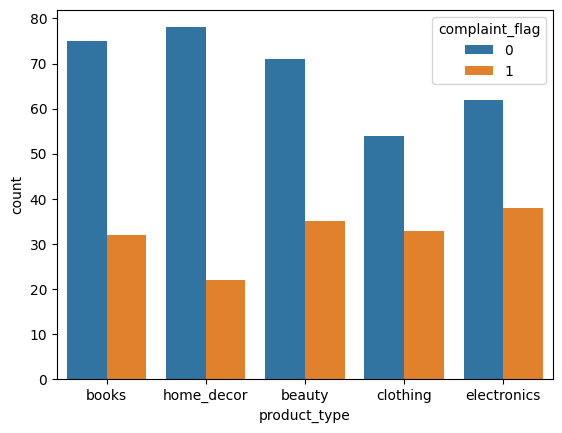

In [56]:
#which product registered more complaints
sns.countplot(x=df['product_type'],data=df,hue='complaint_flag')

In [57]:
#People who bought beauty products registered more complaints

Text(0.5, 1.0, 'Count of Users')

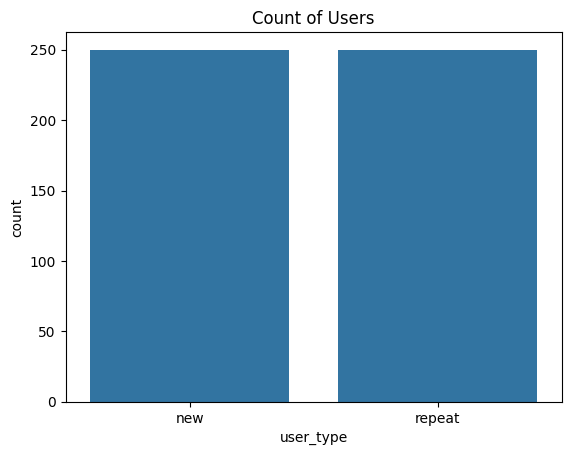

In [58]:
sns.countplot(x=df['user_type'])
plt.title('Count of Users')

<Axes: xlabel='user_type', ylabel='count'>

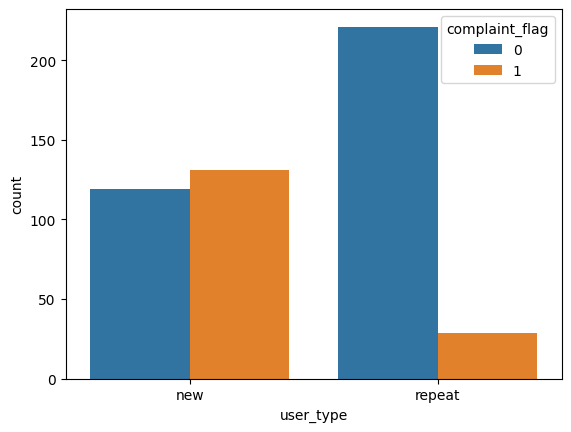

In [59]:
#which users regestered more complaints(new/repeat)
sns.countplot(x=df['user_type'],data=df,hue='complaint_flag')


In [60]:
#repeated customers have less complaint compared new ones. 

In [61]:
#chi-Square test
cat=df.select_dtypes(include='object')
from scipy.stats import chi2_contingency
def ch2(col):
  con_table=pd.crosstab(df[col],df['complaint_flag'])
  chi2, p, dof, expected=chi2_contingency(con_table)
  return p
ch2_value={col: ch2(col) for col in cat.columns}
print(ch2_value)

{'product_type': np.float64(0.0944582760889165), 'user_type': np.float64(3.5634354748224446e-22), 'device': np.float64(0.6479297033231366)}


In [62]:
# Filter for significant associations (p < 0.05)
significant_cols = [col for col, p in ch2_value.items() if p < 0.05]
print("Significant columns:", significant_cols)


Significant columns: ['user_type']


In [63]:
df.drop(['device','product_type'],axis=1,inplace=True)

<Axes: ylabel='price'>

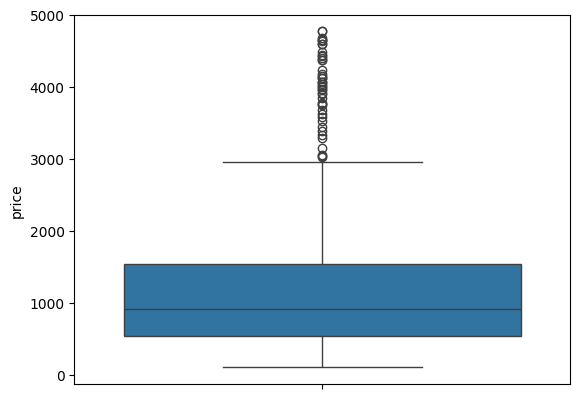

In [64]:
sns.boxplot(df['price'])

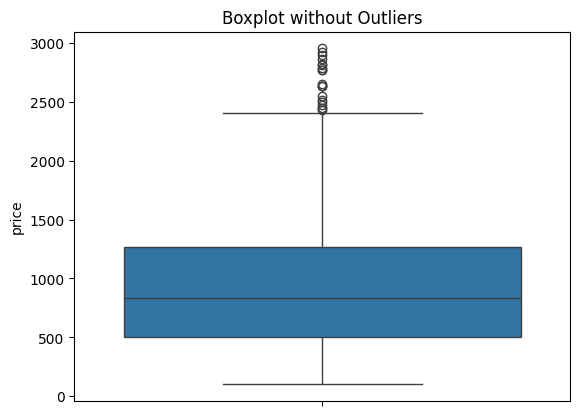

In [65]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
sns.boxplot(data=df['price'])
plt.title("Boxplot without Outliers")
plt.show()

<Axes: ylabel='shipping_delay_days'>

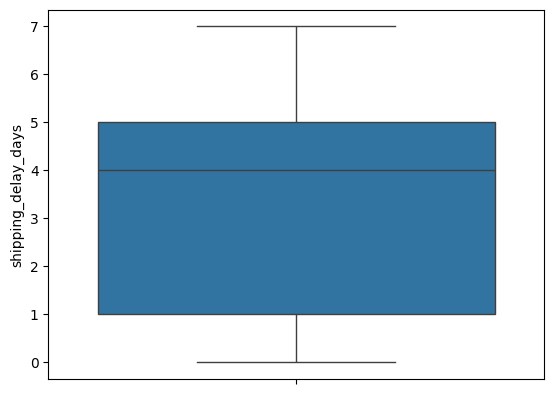

In [66]:
sns.boxplot(df['shipping_delay_days'])

In [69]:
df_e=pd.get_dummies(df[['user_type']],drop_first=True,dtype=int)
df_e

,user_type_repeat
0,0
1,0
2,1
3,0
4,1
...,...
494,1
495,0
496,1
497,1


In [70]:
df1=pd.concat([df,df_e],axis=1)
df1

,price,user_type,shipping_delay_days,complaint_flag,user_type_repeat
0,370,new,6,1,0
1,2224,new,3,0,0
2,414,repeat,1,0,1
3,287,new,3,0,0
4,1371,repeat,3,1,1
...,...,...,...,...,...
494,1184,repeat,5,0,1
495,306,new,1,0,0
496,517,repeat,7,0,1
497,1005,repeat,5,0,1


In [72]:
df1.drop(['user_type'],axis=1,inplace=True)
df1

,price,shipping_delay_days,complaint_flag,user_type_repeat
0,370,6,1,0
1,2224,3,0,0
2,414,1,0,1
3,287,3,0,0
4,1371,3,1,1
...,...,...,...,...
494,1184,5,0,1
495,306,1,0,0
496,517,7,0,1
497,1005,5,0,1


In [73]:
df['complaint_flag'].value_counts()

complaint_flag
0    316
1    140
Name: count, dtype: int64

In [74]:
#smote
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
x=df.drop(['complaint_flag'],axis=1)
col=x.select_dtypes(include='object').columns
for co in col:
    x[co]=LabelEncoder().fit_transform(x[co])
y=df['complaint_flag']
sm=SMOTE(random_state=42)
x_re,y_re=sm.fit_resample(x,y)



In [75]:
y_re.value_counts()

complaint_flag
1    316
0    316
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.30,random_state=42)

In [77]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [84]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
naive=BernoulliNB()
sv=SVC()
model=[knn,naive,sv]

In [85]:
for i in model:
    print(i,'*'*10)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7) **********
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.94      0.88      0.91        88

    accuracy                           0.92       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.92      0.92      0.92       190

BernoulliNB() **********
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       102
           1       1.00      0.83      0.91        88

    accuracy                           0.92       190
   macro avg       0.94      0.91      0.92       190
weighted avg       0.93      0.92      0.92       190

SVC() **********
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       102
           1       0.95      0.86      0.90        88

    accuracy                           0.92       190
   macro avg       0.92      0.91      

In [86]:
print(confusion_matrix(y_test,y_pred))

[[98  4]
 [12 76]]
